In [3]:
from IPython.display import Markdown, display, clear_output
import ipywidgets as widgets
from ipywidgets import *
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import pandas as pd
import seaborn as sns
import dabest
import random
import os
# import re
import csv
# import cufflinks as cf
import itertools
import scipy
from scipy import stats
from scipy.stats import wilcoxon
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from tabulate import tabulate
import warnings
# %matplotlib tk

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

# Read csv
os.chdir("C:/Users/paulc/Desktop/Stage/lmt-analysis-2022/LMT/scripts/Dataframes/")
df = pd.read_csv("Merge.csv")
# Carte de remplacement
remplacement = {'weekend1': '(1)weekend1', '1-3NaCl': '(2)3NaCl', 
                '2-1Amphet': '(3)1Amphet', '3-1Amphet': '(4)1Amphet', 
                '4-1Amphet': '(5)1Amphet', 'weekend2': '(6)weekend2', 
                '5-3Amphet': '(7)3Amphet', '6-3Amphet': '(8)3Amphet', 
                '7-3Amphet': '(9)3Amphet'}

# Utilisation de la méthode "replace" pour remplacer les valeurs
df['Injection'] = df['Injection'].replace(remplacement)

# Organisation boutons Ipywidgets
style = {'description_width': '100px'}
layout = widgets.Layout(width='300px', height='25px')

# Boutons 'reset'
plot_reset = widgets.Button(description='Reset')
stat_reset = widgets.Button(description='Reset')

# Tab1 : Selection of behaviors to analyze
animalnumber = widgets.SelectMultiple(options=['Isolated beh. (eg:Rearing, SAP,...)', 'Beh. involving 2 mice', 
                                               'Beh. involving 3 mice', 'Beh. involving 4 mice'], rows=4, 
                                      description='Behaviors to analyze', disabled=False)

# Selection du type d'analyse "Number" ou "Duration"
data_type=["Number of events", "Event duration"]
choicetype = widgets.Dropdown(options=data_type, value=data_type[0], description='Type', disable=False)

# Définition de variables
date = df["Date"].unique()
injection = df["Injection"].unique()
cage = df["Cage"].unique()
night_phase = df["Night-Phase"].unique()
# bins = df["Bin"].unique()
event = df["name"].unique()
stats = ['Mixed Model', 'Non-Mixed Model']

### TODO : Remettre en ordre le nom des widgets
# Créations des widgets
# drop_injection_plot = sélection pour le jour d'injection
drop_injection_plot = widgets.SelectMultiple(options=injection, rows=5, description='Injection', disabled=False)
# drop_cage_plot = 
drop_cage_plot = widgets.SelectMultiple(options=cage, rows=5, description='Cage', disabled=False)
# drop_event = widgets.SelectMultiple(options=event, value=['Move'], rows=5, description='Event', disabled=False)
drop_event = widgets.Dropdown(options=event, value=event[1], description='Event:', disabled=False)
# drop_night_plot = widgets.SelectMultiple(options=night_phase, rows=5, description='Night_Phase', disabled=False, value=[night_phase[0]])
drop_night_plot = widgets.SelectMultiple(options=night_phase, rows=5, description='Night_Phase', disabled=False)
# drop_night_plot = widgets.Dropdown(options=night_phase, value=1, description='Night_Phase:', disabled=False)
drop_stat = widgets.Dropdown(options=stats, value=stats[0], description='Statistic:', style = style, disabled=False)
drop_injection_stat = widgets.SelectMultiple(options=injection, rows=5, description='Injection', style = style, disabled=False)
drop_cage_stat = widgets.SelectMultiple(options=cage, rows=5, description='Cage', style = style, disabled=False)
drop_night_stat = widgets.SelectMultiple(options=night_phase, rows=5, description='Night_Phase', style = style, disabled=False)

# création widget nom_fichier
nom_dossier = widgets.Text(placeholder='Type here', description='Folder name:', style = style, disabled=False)

# création du widget bouton
statbutton = widgets.Button(description="Récupération des stats", layout = layout, style = style)

output = widgets.Output()

# def update_all_stats_button(statbutton):
#     with output:
#         clear_output(wait=False)
#         # Récupérer les valeurs sélectionnées dans les widgets
#         drop_injection_stat_value = drop_injection_stat.value
#         drop_cage_stat_value = drop_cage_stat.value
#         drop3_values = drop3.options
#         drop_night_stat_value = drop_night_stat.value
        
#         # Créer un nouveau document Word
#         doc = docx.Document()

#         # Ajouter une section au document
#         section = doc.sections[0]
#         section.orientation = WD_ORIENT.LANDSCAPE

#         # Créer un paragraphe pour le titre
#         titre = doc.add_paragraph('Résultats de l\'analyse')
#         titre.style = 'Titre'
    
#         # Itérer sur toutes les valeurs de drop3
#         for drop3_value in drop3_values:
#             # Définir la valeur de drop3
#             drop3.value = drop3_value

#             # Mettre à jour les widgets drop_injection_stat, drop_cage_stat et drop_night_stat
#             drop_injection_stat.value = drop_injection_stat_value
#             drop_cage_stat.value = drop_cage_stat_value
#             drop_night_stat.value = drop_night_stat_value

#             # Exécuter la fonction update_stats()
#             display(interactive_results_stats, output)

#             # Créer le modèle
#             model = smf.mixedlm("new_numbersOfEvents ~ GenoA", df_lm, groups = 'new_cage')
#             # Exécuter le modèle
#             result = model.fit()
#             # Ajouter le résumé du modèle au document
#             resume = doc.add_paragraph()
#             resume.add_run(str(result.summary())).bold = True
#             # Ajouter un graphique au document
#             fig, axs = plt.subplots(1, 2, figsize=(10, 5))
#             sns.stripplot(x='GenoA', y='new_numbersOfEvents', data=df_lm, hue='GenoA', jitter=True,palette={'Amphet':'red', 'NaCl':'blue'}, ax=axs[0])
#             sns.violinplot(x='GenoA', y='new_numbersOfEvents', data=df_lm, hue='GenoA', dodge=False, color='0.8', ax=axs[1])
#             axs[1].set_title(f'Numbers of {val} per bin of each mouse')
#             plt.legend([],[], frameon=False)
#             plt.savefig(f'{drop3_value}.png', dpi=300, bbox_inches='tight')
#             plt.close()
#             image = doc.add_picture(f'{drop3_value}.png', width=Inches(6))
#             # # Ajouter un titre au graphique
#             # titre = doc.add_paragraph()
#             # titre.add_run(f'Fig. 1: Numbers of {drop3_value} per bin of each mouse').bold = True
#             # Enregistrer le document
#             doc.save('AHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH.docx')

# Créer un DataFrame vide pour stocker les résultats
def update_all_stats_button(statbutton):
    with output:
        clear_output(wait=False)
        # Récupérer les valeurs sélectionnées dans les widgets
        drop_injection_stat_value = drop_injection_stat.value
        drop_cage_stat_value = drop_cage_stat.value
        drop_event_values = drop_event.options
        drop_night_stat_value = drop_night_stat.value
        
        # Définir une fonction récursive qui appelle update_stats() avec les valeurs de drop_event
        def recursive_update(drop_event_values, index):
            if index == len(drop_event_values):
                return
            else:
                drop_event_value = drop_event_values[index]
                print(drop_event_value)
                drop_event.value = drop_event_value
                drop_injection_stat_value = drop_injection_stat.value
                drop_cage_stat_value = drop_cage_stat.value
                drop_night_stat_value = drop_night_stat.value
                display(interactive_results_stats)
                recursive_update(drop_event_values, index+1)
        
        # Appeler la fonction récursive pour la première fois
        recursive_update(drop_event_values, 0)

# Associer la fonction on_button_click à l'événement de clic du bouton
statbutton.on_click(update_all_stats_button)

# Association des widgets aux onglets
box1 = HBox([plot_reset, drop_injection_plot, drop_cage_plot, drop_night_plot, drop_event])
box2 = VBox([stat_reset, drop_stat, drop_injection_stat, drop_cage_stat, drop_night_stat, drop_event, nom_dossier, statbutton])

# Création de l'onglet pour les widgets
tab0 = widgets.VBox(children=[animalnumber, choicetype])
tab1 = widgets.Tab(children=[box1])
tab2 = widgets.VBox(children=[box2])
tab1.children = (tab0,) + tab1.children + tab2.children
tab1.set_title(0, 'Animals')
tab1.set_title(1, 'Plot')
tab1.set_title(2, 'Stats')

# Affichage de tab
display(tab1)

# Previous version on Behaviors
# event_options = [
#     ["Move", "Move isolated", "Rearing", "Rear isolated", "Stop isolated", "WallJump", "SAP", "Huddling", "WaterPoint"],
#     ["Contact", "Oral-oral Contact", "Oral-genital Contact", "Side by side Contact",
#      "Side by side Contact, opposite way", "Social approach", "Social escape",
#      "Approach contact", "Approach rear", "Break contact", "Get away", "FollowZone Isolated",
#      "Train2", "Group2", "Move in contact", "Rear in contact"],
#     ["Group3", "Group 3 break", "Group 3 make"],
#     ["Group4", "Group 4 break", "Group 4 make", "Nest3", "Nest4"]
# ]

#TODO: Faire un dictionnaire pour update_event_options (mettre aussi les behaviors de 4 souris, au cas où)
# event_options = [
#     ["Move isolated", "Rearing", "Rear isolated", "Stop isolated", "SAP"],
#     ["Contact", "Oral-oral Contact", "Oral-genital Contact", "Side by side Contact",
#      "Side by side Contact, opposite way", "Social approach", "Social escape",
#      "Approach contact", "Approach rear", "Break contact", "Get away", "FollowZone Isolated",
#      "Train2", "Group2"],
#     ["Group3"]
# ]

# event_options = [
#     ["Move isolated", "Rearing", "Rear isolated", "Stop isolated", "SAP"],
#     ["Contact", "Oral-oral Contact", "Oral-genital Contact", "Side by side Contact",
#      "Side by side Contact, opposite way", "Social approach", "Social escape",
#      "Approach contact", "Approach rear", "Break contact", "Get away", "FollowZone Isolated",
#      "Train2", "Group2"],
#     ["Group3"]
# ]
event_options = {'Isolated beh. (eg:Rearing, SAP,...)': ["Move isolated", "Rearing", "Rear isolated", "Stop isolated", "SAP"],
                 'Beh. involving 2 mice': ["Contact", "Oral-oral Contact", "Oral-genital Contact", "Side by side Contact", 
                                "Side by side Contact, opposite way", "Social approach", "Social escape", 
                                "Approach contact", "Approach rear", "Break contact", "Get away", "FollowZone Isolated", 
                                "Train2", "Group2"],
                 'Beh. involving 3 mice': ["Group3"],
                 'Beh. involving 4 mice': ["Group4", "Nest3", "Nest4"]}
# behavior_dict = {animal: behaviors for behaviors in event_options for animal in behaviors}
# print(behavior_dict)

# Mise à jour des évènements (drop_event) en fonction de la sélection du widget 'animalnumber'
def update_event_options(*args):
    selected_animalnumber = animalnumber.value
    selected_options = []
    for behavior in selected_animalnumber:
        selected_options += event_options[behavior]
    drop_event.options = selected_options

animalnumber.observe(update_event_options, names='value')

#Voir line 71
# Mise à jour des évènements (drop_event) en fonction de la sélection du widget 'animalnumber'
# def update_event_options(change):
#     selected_animals = [int(x) for x in animalnumber.value]
#     event_list = [event_options[i-1] for i in selected_animals]
#     drop_event.options = options
#     drop_event.value = options[0]

# animalnumber.observe(update_event_options, names='value')

## Marche
# def update_event_options(change):
#     selected_animals = animalnumber.value
#     event_list = [event_options[animal_options.index(animal)+1] for animal in selected_animals]
#     options = list(itertools.chain(*event_list))
#     drop_event.options = options
#     drop_event.value = options[0]

# def update_event_options(change):
#     selected_animals = animalnumber.value
#     options = []
#     for animal in selected_animals:
#         if animal == 'Isolated beh. (eg:Rearing, SAP,...)':
#             options += event_options['behaviors1']
#         elif animal == 'Beh. involving 2 mice':
#             options += event_options['behaviors2']
#         elif animal == 'Beh. involving 3 mice':
#             options += event_options['behaviors3']
#         elif animal == 'Beh. involving 4 mice':
#             options += event_options['behaviors4']
#     drop_event.options = list(set(options))
#     drop_event.value = drop_event.options[0]
    
# def update_event_options(change):
#     selected_animals = [int(x) for x in animalnumber.value]
#     event_list = [event_options[i-1] for i in selected_animals]
#     options = list(itertools.chain(*event_list))
#     drop3.options = options
#     drop3.value = options[0]
    
# animalnumber.observe(update_event_options, names='value')

# Fonction de mise à jour des sélections de l'onglet 'Plot' après clic du bouton 'plot_reset'
def reset_selections(plot_reset):
    drop_injection_plot.value = ()
    drop_cage_plot.options = df['Cage'].unique()
    drop_night_plot.options = df['Night-Phase'].unique()

plot_reset.on_click(reset_selections)

# Fonction de mise à jour des sélections de l'onglet 'Stat' après clic du bouton 'stat_reset'
def reset_selections(stat_reset):
    drop_injection_stat.value = ()
    drop_cage_stat.options = df['Cage'].unique()
    drop_night_stat.options = df['Night-Phase'].unique()

stat_reset.on_click(reset_selections)

# Pour sélectionner plusieurs Dates
def update_options_plot(change):
    # Filtrer les données du DataFrame en fonction des valeurs sélectionnées dans drop_injection_plot
    filtered_df = df[df['Injection'].isin(drop_injection_plot.value)]
    
    # Mettre à jour les options de drop_cage_plot avec les valeurs uniques de la colonne "Cage" pour les données filtrées
    cage_options_plot = filtered_df['Cage'].unique()
    drop_cage_plot.options = cage_options_plot
    
    # Conserver les valeurs sélectionnées dans drop_cage_plot si elles sont encore valides après la mise à jour des options
    drop_cage_plot.value = list(set(drop_cage_plot.value) & set(cage_options_plot))
    
    # Mettre à jour les options de drop_night_plot avec les valeurs uniques de la colonne "Night-Phase" pour les données filtrées
    night_options_plot = filtered_df['Night-Phase'].unique()
    drop_night_plot.options = night_options_plot
    
    # Conserver les valeurs sélectionnées dans drop_night_plot si elles sont encore valides après la mise à jour des options
    drop_night_plot.value = list(set(drop_night_plot.value) & set(night_options_plot))

# Assigner la fonction update_options à l'événement "observe" de drop_injection_plot
drop_injection_plot.observe(update_options_plot, names='value')

def update_options_stat(change):
    # Filtrer les données du DataFrame en fonction des valeurs sélectionnées dans drop_injection_stat
    filtered_df = df[df['Injection'].isin(drop_injection_stat.value)]
    
    # Mettre à jour les options de drop2 avec les valeurs uniques de la colonne "Cage" pour les données filtrées
    cage_options_stats = filtered_df['Cage'].unique()
    drop_cage_stat.options = cage_options_stats
    
    # Conserver les valeurs sélectionnées dans drop2 si elles sont encore valides après la mise à jour des options
    drop_cage_stat.value = list(set(drop_cage_stat.value) & set(cage_options_stats))
    
    # Mettre à jour les options de drop4 avec les valeurs uniques de la colonne "Night-Phase" pour les données filtrées
    night_options_stats = filtered_df['Night-Phase'].unique()
    drop_night_stat.options = night_options_stats
    
    # Conserver les valeurs sélectionnées dans drop4 si elles sont encore valides après la mise à jour des options
    drop_night_stat.value = list(set(drop_night_stat.value) & set(night_options_stats))

# Assigner la fonction update_options à l'événement "observe" de drop_injection_stat
drop_injection_stat.observe(update_options_stat, names='value')

def update_temp_df(change):
    # Mise à jour de temp_df en fonction de la sélection actuelle des widgets
    global temp_df
    temp_df = df[(df["Injection"].isin((drop_injection_plot.value))) & (df["Cage"].isin((drop_cage_plot.value))) & (df["name"] == drop_event.value) & (df["Night-Phase"].isin((drop_night_plot.value)))]

# Initialisation de temp_df en fonction de la sélection initiale des widgets
temp_df = df[(df["Injection"].isin((drop_injection_plot.value))) & (df["Cage"].isin((drop_cage_plot.value))) & (df["name"] == drop_event.value) & (df["Night-Phase"].isin((drop_night_plot.value)))]

# Observation des widgets pour mettre à jour temp_df lorsque la sélection est modifiée
drop_injection_plot.observe(update_temp_df, 'value')
drop_cage_plot.observe(update_temp_df, 'value')
drop_event.observe(update_temp_df, 'value')
drop_night_plot.observe(update_temp_df, 'value')

# Fonction pour afficher le plot en fonction des choix de l'utilisateur
def update_dropdown(date, cage, night_phase, event):
    clear_output()
    for date_val, cage_val, night_phase_val in itertools.product(date, cage, night_phase):
        display(Markdown(f"""<h3>L'analyse est réalisée sur {animalnumber.value[0]} souris, l'injection choisie est '{date_val}', 
                         il s'agit de la {cage_val} pour l'évènement '{drop_event.value}' durant la phase {night_phase_val} de nuit !</h3>"""))
        temp_df_loop0 = df[(df["Injection"] == date_val) & (df["Cage"] == cage_val) & (df["name"] == drop_event.value) & (df["Night-Phase"] == night_phase_val)]
        # Créer un nouveau dataframe avec toutes les colonnes de l'ancien dataframe
        df_new = temp_df_loop0.copy()
        # Ajouter une colonne avec la somme des numberOfEvents de chaque RFidA de chaque Bin
        df_new['new_numbersOfEvents'] = df_new.groupby(['Bin', 'RFidA'])['numberOfEvents'].transform('sum')
        # Supprimer les lignes utilisées pour faire la somme
        df_new = df_new.drop_duplicates(subset=['Bin', 'RFidA'], keep='last')
        fig, ax1 = plt.subplots(figsize=(18,12))
        ax2 = fig.add_axes([1, 0.25, 0.25, 0.5])
        sns.lineplot(df_new, y='new_numbersOfEvents', x='Bin', hue="GenoA", style='RFidA', palette={'Amphet':'red', 'NaCl':'blue'}, ax=ax1)
        ax1.set_title(f'Numbers of {drop_event.value} per bin of each mouse')
        ax1.set_ylabel(f'Numbers of {drop_event.value}')
        sns.barplot(data=df_new, y='new_numbersOfEvents', x="GenoA", palette={'Amphet':'red', 'NaCl':'blue'}, ax=ax2)
        ax2.set_title("A barplot")
        plt.show()

def update_stats(date, cage, night_phase, event, choice_type):
    clear_output()
    dfs = []
    global pivot_df2
    ### TODO: Colorpalette avec la boucle de patch pour la légende
    colors = ['grey', 'blue', 'yellow', 'green', 'red', 'violet']
    handles = []
    j = 0
    if choicetype.value == 'Number of events' :
        for date_val, cage_val, night_phase_val in itertools.product(date, cage, night_phase):
            display(Markdown(f"""<h3>L'analyse est réalisée sur {animalnumber.value[0]} souris, l'injection choisie est '{date_val}', 
            il s'agit de la {cage_val} pour l'évènement '{drop_event.value}' durant la phase {night_phase_val} de nuit !</h3>"""))
            temp_df_loop1 = df[(df["Injection"] == date_val) & (df["Cage"] == cage_val) & (df["name"] == drop_event.value) & (df["Night-Phase"] == night_phase_val)]
            # Créer un nouveau dataframe avec toutes les colonnes de l'ancien dataframe
            df_new = temp_df_loop1.copy()
            # Ajouter une colonne avec la somme des numberOfEvents de chaque RFidA de chaque Bin
            df_new['new_numbersOfEvents'] = df_new.groupby(['Bin', 'RFidA'])['numberOfEvents'].transform('sum')
            # Supprimer les lignes utilisées pour faire la somme
            df_new = df_new.drop_duplicates(subset=['Bin', 'RFidA'], keep='last')
            fig, ax1 = plt.subplots(figsize=(10,4))
            ax2 = fig.add_axes([1, 0.25, 0.25, 0.5])
            sns.barplot(data=df_new, y='new_numbersOfEvents', x="GenoA", palette={'Amphet':'red', 'NaCl':'blue'}, ax=ax2)
            ax2.set_title("A barplot")
            plt.show()
            dfs.append(df_new)
        if not dfs:
            return
        else:
            merged_df = pd.concat(dfs)
            merged_df['new_cage'] = merged_df['Cage'].str.extract('(\d+)').astype(int)
            display(merged_df)
            global df_lm # Df for stats
            df_lm = merged_df.copy()
            df_lm = merged_df.groupby(['new_cage', 'RFidA', 'GenoA', 'Date'])['new_numbersOfEvents'].sum().reset_index()
            
            # Compute Mixed Models stats
            if drop_stat.value == "Mixed Model":
                ssdd = statsmodels.stats.descriptivestats.describe(df_lm, stats=['mean', 'std_err', 'std', 'median'])
                model = smf.mixedlm("new_numbersOfEvents ~ GenoA", df_lm, groups = 'new_cage')  #Creates the model 
                result = model.fit()  #Run model
                print(result.summary())  #Print summary
                pivot_df2 = df_lm.pivot(index=['RFidA', 'new_cage'], columns='Date', values='new_numbersOfEvents').reset_index()
                pivot_df2.sort_values('new_cage', inplace=True)

                # Créer les 4 nouvelles colonnes et les remplir avec les valeurs de la 3ème colonne à la dernière colonne
                pivot_df2['Control'] = pivot_df2.iloc[:, 2::4].sum(axis=1)
                pivot_df2['Type1'] = pivot_df2.iloc[:, 3::4].sum(axis=1)
                pivot_df2['Type2'] = pivot_df2.iloc[:, 4::4].sum(axis=1)
                pivot_df2['Type3'] = pivot_df2.iloc[:, 5::4].sum(axis=1)

                # création de la colonne avec l'index
                pivot_df2.reset_index(inplace=True)
                pivot_df2.index = range(len(pivot_df2))
                pivot_df2.index.name = 'Index'
                pivot_df2['Index'] = pivot_df2.index.astype(int)
                
                two_groups_paired_baseline = dabest.load(data=pivot_df2, idx=("Control", "Type1", "Type2", "Type3"), id_col="Index", paired='baseline')
                
                # for i in pivot_df2.new_cage.unique():
                #     handle = Patch(color=colors[j], label=f"{i}")
                #     handles.append(handle)
                #     j+=1
                
                fig, axs = plt.subplots(1, 3, figsize=(25, 10))
                fig.subplots_adjust(wspace=0.5)
                # sns.stripplot(x='GenoA', y='new_totallength', order = ['NaCl', 'Amphet'], data=df_lm, jitter=True, palette={'Amphet':'red', 'NaCl':'blue'}, ax=axs[0])
                # sns.violinplot(x='GenoA', y='new_totallength', order = ['NaCl', 'Amphet'], data=df_lm, dodge=False, color='0.8', ax=axs[0])
                # axs[0].set_title(f'Total duration time of {drop_event.value} per injection type')
                
                # 1er plot
                plotdabest = dabest.load(data=df_lm, x="GenoA", y="new_numbersOfEvents", idx=("NaCl", "Amphet"), id_col="new_cage")
                # axs[0].legend(title='Cage', labels=df_lm.data['new_cage'].unique(), frameon=True, loc=(0.85, 0.4))
                # Tracer le graphique
                plotdabest.mean_diff.plot(ax=axs[0], color_col='new_cage')
                axs[0].set_title(f"""Sum of numberOfEvents per Cage for the '{drop_event.value}' event""", loc='left')
                # axs[0].text(2.82, 30000, 'Cage', fontsize = 10)
                # plt.legend(handles=handles, title='Cage')
                
                # 2ème plot
                ax = two_groups_paired_baseline.mean_diff.plot(color_col='new_cage', ax=axs[1])
                axs[1].legend(title='Cage', labels=pivot_df2['new_cage'].unique(), loc=(0.95, 0.5))
                
                # 3ème plot
                axs[2].axis('off')
                table0 = tabulate(ssdd, headers="keys", colalign=("center", "center", "center", "center", "center"))
                axs[2].annotate(table0, xy=(-0.25, 0.75), xycoords='axes fraction', fontsize=10, va='top', family='monospace')
                table1 = tabulate(result.summary().tables[0], colalign=("center", "center", "center", "center", "center"))
                axs[2].annotate(table1, xy=(-0.25, 0.55), xycoords='axes fraction', fontsize=10, va='top', family='monospace')
                table2 = tabulate(result.summary().tables[1], headers="keys", tablefmt="plain", colalign=("center", "center", "center", "center", "center"))
                axs[2].annotate(table2, xy=(-0.25, 0.35), xycoords='axes fraction', fontsize=10, va='top', family='monospace')
                
            else :
                return
    elif choicetype.value == 'Event duration' :
        for date_val, cage_val, night_phase_val in itertools.product(date, cage, night_phase):
            display(Markdown(f"<h3>L'analyse est réalisée sur {animalnumber.value[0]} souris, l'injection choisie est '{date_val}', il s'agit de la {cage_val} pour l'évènement '{drop_event.value}' durant la phase {night_phase_val} de nuit !</h3>"))
            # global temp_df_loop1
            temp_df_loop1 = df[(df["Injection"] == date_val) & (df["Cage"] == cage_val) & (df["name"] == drop_event.value) & (df["Night-Phase"] == night_phase_val)]
            # Créer un nouveau dataframe avec toutes les colonnes de l'ancien dataframe
            df_new = temp_df_loop1.copy()
            # Ajouter une colonne avec la somme des numberOfEvents de chaque RFidA de chaque Bin
            df_new['new_totallength'] = df_new.groupby(['Bin', 'RFidA'])['totalLength'].transform('sum')
            # Supprimer les lignes utilisées pour faire la somme
            df_new = df_new.drop_duplicates(subset=['Bin', 'RFidA'], keep='last')
            fig, ax1 = plt.subplots(figsize=(10,4))
            ax2 = fig.add_axes([1, 0.25, 0.25, 0.5])
            sns.barplot(data=df_new, y='new_totallength', x="GenoA", palette={'Amphet':'red', 'NaCl':'blue'}, ax=ax2)
            ax2.set_title("A barplot")
            plt.show()
            dfs.append(df_new)
        if not dfs:
            return
        else:
            # global merged_df
            merged_df = pd.concat(dfs)
            merged_df['new_cage'] = merged_df['Cage'].str.extract('(\d+)').astype(int)
            display(merged_df)
            # global df_lm
            df_lm = merged_df.copy()
            df_lm = merged_df.groupby(['new_cage', 'RFidA', 'GenoA', 'Date'])['new_totallength'].sum().reset_index()
            if drop_stat.value == "Mixed Model":
                ssdd = statsmodels.stats.descriptivestats.describe(df_lm, stats=['mean', 'std_err', 'std', 'median'])
                model = smf.mixedlm("new_totallength ~ GenoA", df_lm, groups = 'new_cage')  #Creates the model 
                result = model.fit()  #Run model
                print(result.summary())  #Print summary
                pivot_df2 = df_lm.pivot(index=['RFidA', 'new_cage'], columns='Date', values='new_totallength').reset_index()
                pivot_df2.sort_values('new_cage', inplace=True)

                # Créer les 4 nouvelles colonnes et les remplir avec les valeurs de la 3ème colonne à la dernière colonne
                pivot_df2['Control'] = pivot_df2.iloc[:, 2::4].sum(axis=1)
                pivot_df2['Type1'] = pivot_df2.iloc[:, 3::4].sum(axis=1)
                pivot_df2['Type2'] = pivot_df2.iloc[:, 4::4].sum(axis=1)
                pivot_df2['Type3'] = pivot_df2.iloc[:, 5::4].sum(axis=1)

                # création de la colonne avec l'index
                pivot_df2.reset_index(inplace=True)
                pivot_df2.index = range(len(pivot_df2))
                pivot_df2.index.name = 'Index'
                pivot_df2['Index'] = pivot_df2.index.astype(int)
                
                two_groups_paired_baseline = dabest.load(data=pivot_df2, idx=("Control", "Type1", "Type2", "Type3"), id_col="Index", paired='baseline')
                
                # for i in pivot_df2.new_cage.unique():
                #     handle = Patch(color=colors[j], label=f"{i}")
                #     handles.append(handle)
                #     j+=1
                
                fig, axs = plt.subplots(1, 3, figsize=(25, 10))
                fig.subplots_adjust(wspace=0.5)
                # sns.stripplot(x='GenoA', y='new_totallength', order = ['NaCl', 'Amphet'], data=df_lm, jitter=True, palette={'Amphet':'red', 'NaCl':'blue'}, ax=axs[0])
                # sns.violinplot(x='GenoA', y='new_totallength', order = ['NaCl', 'Amphet'], data=df_lm, dodge=False, color='0.8', ax=axs[0])
                # axs[0].set_title(f'Total duration time of {drop_event.value} per injection type')
                
                # 1er plot
                plotdabest = dabest.load(data=df_lm, x="GenoA", y="new_totallength", idx=("NaCl", "Amphet"), id_col="new_cage")
                # axs[0].legend(title='Cage', labels=df_lm.data['new_cage'].unique(), frameon=True, loc=(0.85, 0.4))
                # Tracer le graphique
                first = plotdabest.mean_diff.plot(color_col='new_cage', ax=axs[0])
                axs[0].set_title(f"""Sum of totalLength per Cage for the '{drop_event.value}' event""", loc='left')
                # axs[0].text(2.82, 30000, 'Cage', fontsize = 10)
                # axs[0].legend(title='Cage', labels=pivot_df2['new_cage'].unique(), frameon=True, loc=(0.95, 0.75))
                # Récupérer les poignées des lignes de légende
                # handles, labels = axs[0].get_legend_handles_labels()

                # Supprimer la légende existante
                # axs[0].legend_.remove()
                # plt.legend(handles=handles, title='Cage')
                
                # 2ème plot
                ax1 = two_groups_paired_baseline.mean_diff.plot(color_col='new_cage', ax=axs[1])
                axs[1].legend(title='Cage', labels=pivot_df2['new_cage'].unique(), frameon=False, loc=(0.95, 0.75))
                
                # 3ème plot
                axs[2].axis('off')
                table0 = tabulate(ssdd, headers="keys", colalign=("center", "center", "center", "center", "center"))
                axs[2].annotate(table0, xy=(-0.25, 0.75), xycoords='axes fraction', fontsize=10, va='top', family='monospace')
                table1 = tabulate(result.summary().tables[0], colalign=("center", "center", "center", "center", "center"))
                axs[2].annotate(table1, xy=(-0.25, 0.55), xycoords='axes fraction', fontsize=10, va='top', family='monospace')
                table2 = tabulate(result.summary().tables[1], headers="keys", tablefmt="plain", colalign=("center", "center", "center", "center", "center"))
                axs[2].annotate(table2, xy=(-0.25, 0.35), xycoords='axes fraction', fontsize=10, va='top', family='monospace')
                # axs[1].text(0, 0.75, result.summary(), verticalalignment='center_baseline', horizontalalignment='left', color='black', fontsize=15)
                # plt.legend([],[], fontsize="small", frameon=False)
                
            else :
                return

def results_update_stats(date, cage, night_phase, event, choice_type):
    clear_output()
    dfs = []
    global pivot_df_clk
    if drop_stat.value == "Mixed Model":
        # Créer un nouveau dossier pour les fichiers
        new_folder_path = str(nom_dossier.value)
        if not os.path.exists(new_folder_path):
            os.makedirs(new_folder_path)
        # txt_file_path = os.path.join(new_folder_path, "Stats_results.txt")
        # with open(txt_file_path, "w") as f:
        if choicetype.value == 'Number of events' :
            for r_drop_event in drop_event.options:
                for date_val, cage_val, night_phase_val in itertools.product(date, cage, night_phase):
                    temp_df_loop_clk = df[(df["Injection"] == date_val) & (df["Cage"] == cage_val) & (df["name"] == r_drop_event) & (df["Night-Phase"] == night_phase_val)]
                    # Créer un nouveau dataframe avec toutes les colonnes de l'ancien dataframe
                    df_new_clk = temp_df_loop_clk.copy()
                    # Ajouter une colonne avec la somme des numberOfEvents de chaque RFidA de chaque Bin
                    df_new_clk['new_numbersOfEvents'] = df_new_clk.groupby(['Bin', 'RFidA'])['numberOfEvents'].transform('sum')
                    # Supprimer les lignes utilisées pour faire la somme
                    df_new_clk = df_new_clk.drop_duplicates(subset=['Bin', 'RFidA'], keep='last')
                    dfs_clk.append(df_new_clk)
                # global merged_df
                merged_df_clk = pd.concat(dfs_clk) 
                merged_df_clk['new_cage'] = merged_df_clk['Cage'].str.extract('(\d+)').astype(int)
                # global df_lm
                df_lm_clk = merged_df_clk.copy()
                df_lm_clk = merged_df_clk.groupby(['new_cage', 'RFidA', 'GenoA', 'Date'])['new_numbersOfEvents'].sum().reset_index()
                # f.write(f'Stats pour l\'évènement {r_drop_event} : \n \n')
                ssdd = statsmodels.stats.descriptivestats.describe(df_lm_clk, stats=['mean', 'std_err', 'std', 'median'])
                # f.write(str(ssdd) + '\n \n')
                model = smf.mixedlm("new_numbersOfEvents ~ GenoA", df_lm_clk, groups = 'new_cage')
                result = model.fit()
                pivot_df_clk = df_lm_clk.pivot(index=['RFidA', 'new_cage'], columns='Date', values='new_numbersOfEvents').reset_index()
                pivot_df_clk.sort_values('new_cage', inplace=True)

                # Créer les 4 nouvelles colonnes et les remplir avec les valeurs de la 3ème colonne à la dernière colonne
                pivot_df_clk['Control'] = pivot_df_clk.iloc[:, 2::4].sum(axis=1)
                pivot_df_clk['Type1'] = pivot_df_clk.iloc[:, 3::4].sum(axis=1)
                pivot_df_clk['Type2'] = pivot_df_clk.iloc[:, 4::4].sum(axis=1)
                pivot_df_clk['Type3'] = pivot_df_clk.iloc[:, 5::4].sum(axis=1)

                # création de la colonne avec l'index
                pivot_df_clk.reset_index(inplace=True)
                pivot_df_clk.index = range(len(pivot_df_clk))
                pivot_df_clk.index.name = 'Index'
                pivot_df_clk['Index'] = pivot_df_clk.index.astype(int)
                pivot_df_clk.to_excel(f'{r_drop_event}.xlsx', sheet_name='nom_de_la_feuille_pivot')
                print(pivot_df_clk)
                
                two_groups_paired_baseline_clk = dabest.load(data=pivot_df_clk, idx=("Control", "Type1", "Type2", "Type3"), id_col="Index", paired='baseline')
                
                fig, axs = plt.subplots(1, 3, figsize=(25, 10))
                fig.subplots_adjust(wspace=0.5)
                
                # 1er plot
                plotdabest_clk = dabest.load(data=df_lm_clk, x="GenoA", y="new_numbersOfEvents", idx=("NaCl", "Amphet"), id_col="new_cage")
                # axs[0].legend(title='Cage', labels=df_lm.data['new_cage'].unique(), frameon=True, loc=(0.85, 0.4))
                # Tracer le graphique
                plotdabest_clk.mean_diff.plot(ax=axs[0], color_col='new_cage')
                axs[0].set_title(f"""Sum of numberOfEvents per Cage for the '{r_drop_event}' event""", loc='left')
                # axs[0].text(2.82, 2.65, 'Cage', fontsize = 10)
                
                # 2ème plot
                ax = two_groups_paired_baseline_clk.mean_diff.plot(color_col='new_cage', ax=axs[1])
                axs[1].legend(title='Cage', labels=pivot_df_clk['new_cage'].unique(), frameon=True, loc=(0.95, 0.75))
                
                # 3ème plot
                axs[2].axis('off')
                table0 = tabulate(ssdd, headers="keys", colalign=("center", "center", "center", "center", "center"))
                axs[2].annotate(table0, xy=(-0.25, 0.75), xycoords='axes fraction', fontsize=10, va='top', family='monospace')
                table1 = tabulate(result.summary().tables[0], colalign=("center", "center", "center", "center", "center"))
                axs[2].annotate(table1, xy=(-0.25, 0.55), xycoords='axes fraction', fontsize=10, va='top', family='monospace')
                table2 = tabulate(result.summary().tables[1], headers="keys", tablefmt="plain", colalign=("center", "center", "center", "center", "center"))
                axs[2].annotate(table2, xy=(-0.25, 0.35), xycoords='axes fraction', fontsize=10, va='top', family='monospace')
                # f.write(str(result.summary()))
                # f.write('\n')
                # text = '-'
                # f.write(f"{text:-<65} \n \n")
                # fig, axs = plt.subplots(1, 2, figsize=(10, 5))
                # sns.stripplot(x='GenoA', y='new_numbersOfEvents', order = ['NaCl', 'Amphet'], data=df_lm, jitter=True, palette={'Amphet':'red', 'NaCl':'blue'}, ax=axs[0])
                # sns.violinplot(x='GenoA', y='new_numbersOfEvents', order = ['NaCl', 'Amphet'], data=df_lm, dodge=False, color='0.8', ax=axs[0])
                # axs[0].set_title(f'Numbers of {r_drop_event} per bin of each mouse')
                # axs[1].axis('off')
                # table0 = tabulate(ssdd, headers="keys", colalign=("center", "center", "center", "center", "center"))
                # axs[1].annotate(table0, xy=(-0.025, 0.95), xycoords='axes fraction', fontsize=10, va='top', family='monospace')
                # table1 = tabulate(result.summary().tables[0], colalign=("center", "center", "center", "center", "center"))
                # axs[1].annotate(table1, xy=(-0.025, 0.65), xycoords='axes fraction', fontsize=10, va='top', family='monospace')
                # table2 = tabulate(result.summary().tables[1], headers="keys", tablefmt="plain", colalign=("center", "center", "center", "center", "center"))
                # axs[1].annotate(table2, xy=(-0.025, 0.25), xycoords='axes fraction', fontsize=10, va='top', family='monospace')
                # plt.legend([],[], fontsize="small", frameon=False)
                image_file_path = os.path.join(new_folder_path, f'{r_drop_event}.png')
                plt.savefig(image_file_path, dpi=300, bbox_inches='tight')
            plt.close(fig)
                # f.close()
        elif choicetype.value == 'Event duration' :
            for r_drop_event in drop_event.options:
                for date_val, cage_val, night_phase_val in itertools.product(date, cage, night_phase):
                    temp_df_loop_clk = df[(df["Injection"] == date_val) & (df["Cage"] == cage_val) & (df["name"] == r_drop_event) & (df["Night-Phase"] == night_phase_val)]
                    # Créer un nouveau dataframe avec toutes les colonnes de l'ancien dataframe
                    df_new_clk = temp_df_loop_clk.copy()
                    # Ajouter une colonne avec la somme des numberOfEvents de chaque RFidA de chaque Bin
                    df_new_clk['new_totallength'] = df_new_clk.groupby(['Bin', 'RFidA'])['totalLength'].transform('sum')
                    # Supprimer les lignes utilisées pour faire la somme
                    df_new_clk = df_new_clk.drop_duplicates(subset=['Bin', 'RFidA'], keep='last')
                    dfs_clk.append(df_new_clk)
                # global merged_df
                merged_df_clk = pd.concat(dfs_clk) 
                merged_df_clk['new_cage'] = merged_df_clk['Cage'].str.extract('(\d+)').astype(int)
                # global df_lm
                # global df_lm
                df_lm_clk = merged_df_clk.copy()
                df_lm_clk = merged_df_clk.groupby(['new_cage', 'RFidA', 'GenoA', 'Date'])['new_totallength'].sum().reset_index()
                # f.write(f'Stats pour l\'évènement {r_drop_event} : \n \n')
                ssdd = statsmodels.stats.descriptivestats.describe(df_lm_clk, stats=['mean', 'std_err', 'std', 'median'])
                # f.write(str(ssdd) + '\n \n')
                model = smf.mixedlm("new_totallength ~ GenoA", df_lm_clk, groups = 'new_cage')
                result = model.fit()
                pivot_df_clk = df_lm_clk.pivot(index=['RFidA', 'new_cage'], columns='Date', values='new_totallength').reset_index()
                pivot_df_clk.sort_values('new_cage', inplace=True)

                # Créer les 4 nouvelles colonnes et les remplir avec les valeurs de la 3ème colonne à la dernière colonne
                pivot_df_clk['Control'] = pivot_df_clk.iloc[:, 2::4].sum(axis=1)
                pivot_df_clk['Type1'] = pivot_df_clk.iloc[:, 3::4].sum(axis=1)
                pivot_df_clk['Type2'] = pivot_df_clk.iloc[:, 4::4].sum(axis=1)
                pivot_df_clk['Type3'] = pivot_df_clk.iloc[:, 5::4].sum(axis=1)

                # création de la colonne avec l'index
                pivot_df_clk.reset_index(inplace=True)
                pivot_df_clk.index = range(len(pivot_df_clk))
                pivot_df_clk.index.name = 'Index'
                pivot_df_clk['Index'] = pivot_df_clk.index.astype(int)
                # chemin=r"C:\Users\paulc\Desktop\Stage\lmt-analysis-2022\LMT\scripts\Dataframes\nom_du_fichier.xlsx"
                pivot_df_clk.to_excel(f'{r_drop_event}.xlsx', sheet_name='nom_de_la_feuille_pivot')
                print(pivot_df_clk)
                
                two_groups_paired_baseline_clk = dabest.load(data=pivot_df_clk, idx=("Control", "Type1", "Type2", "Type3"), id_col="Index", paired='baseline')
                
                fig, axs = plt.subplots(1, 3, figsize=(25, 10))
                fig.subplots_adjust(wspace=0.5)
                
                # 1er plot
                plotdabest_clk = dabest.load(data=df_lm_clk, x="GenoA", y="new_totallength", idx=("NaCl", "Amphet"), id_col="new_cage")
                # axs[0].legend(title='Cage', labels=df_lm.data['new_cage'].unique(), frameon=True, loc=(0.85, 0.4))
                # Tracer le graphique
                plotdabest_clk.mean_diff.plot(ax=axs[0], color_col='new_cage')
                axs[0].set_title(f"""Sum of totalLength per Cage for the '{r_drop_event}' event""", loc='left')
                # axs[0].text(2.82, 265000, 'Cage', fontsize = 10)
                
                # 2ème plot
                ax = two_groups_paired_baseline_clk.mean_diff.plot(color_col='new_cage', ax=axs[1])
                axs[1].legend(title='Cage', labels=pivot_df_clk['new_cage'].unique(), frameon=True, loc=(0.95, 0.75))
                
                # 3ème plot
                axs[2].axis('off')
                table0 = tabulate(ssdd, headers="keys", colalign=("center", "center", "center", "center", "center"))
                axs[2].annotate(table0, xy=(-0.25, 0.75), xycoords='axes fraction', fontsize=10, va='top', family='monospace')
                table1 = tabulate(result.summary().tables[0], colalign=("center", "center", "center", "center", "center"))
                axs[2].annotate(table1, xy=(-0.25, 0.55), xycoords='axes fraction', fontsize=10, va='top', family='monospace')
                table2 = tabulate(result.summary().tables[1], headers="keys", tablefmt="plain", colalign=("center", "center", "center", "center", "center"))
                axs[2].annotate(table2, xy=(-0.25, 0.35), xycoords='axes fraction', fontsize=10, va='top', family='monospace')
                # f.write(str(result.summary()))
                # f.write('\n')
                # text = '-'
                # f.write(f"{text:-<65} \n \n")
                # fig, axs = plt.subplots(1, 2, 3, figsize=(10, 5))
                # sns.stripplot(x='GenoA', y='new_totallength', order = ['NaCl', 'Amphet'], data=df_lm, jitter=True, palette={'Amphet':'red', 'NaCl':'blue'}, ax=axs[0])
                # sns.violinplot(x='GenoA', y='new_totallength', order = ['NaCl', 'Amphet'], data=df_lm, dodge=False, color='0.8', ax=axs[0])
                # axs[0].set_title(f'Total duration time of {r_drop_event} per injection type')
                # axs[1].axis('off')
                # table0 = tabulate(ssdd, headers="keys", colalign=("center", "center", "center", "center", "center"))
                # axs[1].annotate(table0, xy=(-0.025, 0.95), xycoords='axes fraction', fontsize=10, va='top', family='monospace')
                # table1 = tabulate(result.summary().tables[0], colalign=("center", "center", "center", "center", "center"))
                # axs[1].annotate(table1, xy=(-0.025, 0.65), xycoords='axes fraction', fontsize=10, va='top', family='monospace')
                # table2 = tabulate(result.summary().tables[1], headers="keys", tablefmt="plain", colalign=("center", "center", "center", "center", "center"))
                # axs[1].annotate(table2, xy=(-0.025, 0.25), xycoords='axes fraction', fontsize=10, va='top', family='monospace')
                # plt.legend([],[], fontsize="small", frameon=False)
                image_file_path = os.path.join(new_folder_path, f'{r_drop_event}.png')
                plt.savefig(image_file_path, dpi=300, bbox_inches='tight')
            plt.close(fig)

        else :
            return
    else :
        return

interactive_plot = widgets.interactive_output(update_dropdown, {'date': drop_injection_plot, 'cage': drop_cage_plot, 'night_phase': drop_night_plot, 'event': drop_event})
display(interactive_plot)

interactive_stats = widgets.interactive_output(update_stats, {'date': drop_injection_stat, 'cage': drop_cage_stat, 'night_phase': drop_night_stat, 'event': drop_event, 'choice_type':choicetype})
display(interactive_stats)

interactive_results_stats = widgets.interactive_output(results_update_stats, {'date': drop_injection_stat, 'cage': drop_cage_stat, 'night_phase': drop_night_stat, 'event': drop_event, 'choice_type':choicetype})
# display(interactive_results_stats)
# Faire un on_change de Date quand on clique sur la Cage après avoir choisi la Date 

Output()

Output()

<Figure size 1400x800 with 0 Axes>

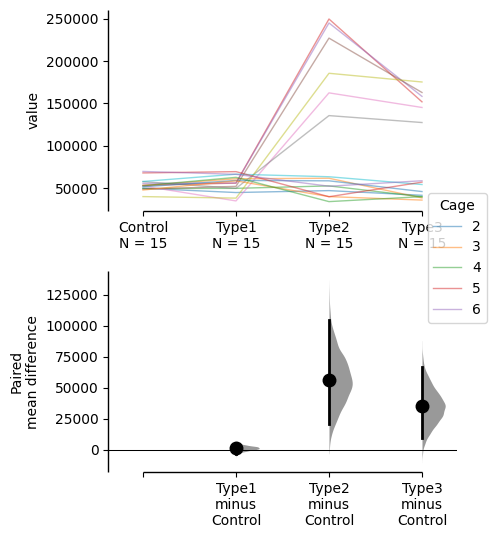

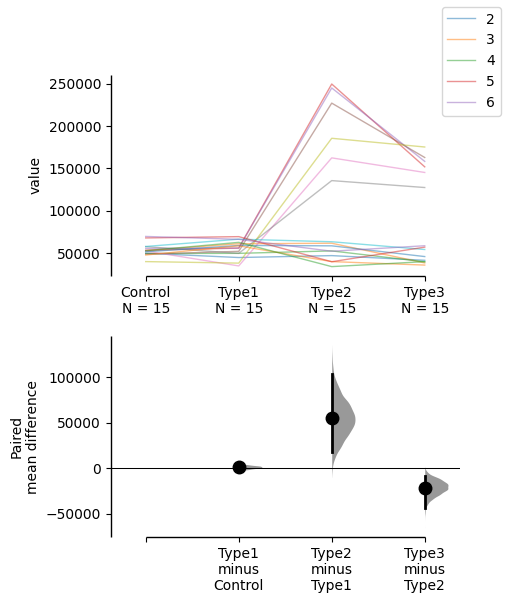

In [26]:
# pivot_df = df_lm.pivot(index=['RFidA', 'new_cage', 'Date'], columns='GenoA', values='new_numbersOfEvents').reset_index()

# # Renommer les colonnes
# pivot_df.columns = ['RFidA', 'new_cage', 'Date', 'val1', 'val2']
# pivot_df['Type1'] = 'Amphet'
# pivot_df['Type2'] = 'NaCl'

# # Réorganiser les colonnes pour avoir l'ordre souhaité
# pivot_df = pivot_df[['RFidA', 'new_cage', 'Date', 'Type1', 'val1', 'Type2', 'val2']]
# pivot_df.sort_values(['new_cage','RFidA'], inplace=True)
# pivot_df.groupby("RFidA")

# pivot_df2 = df_lm.pivot(index=['RFidA', 'new_cage'], columns='Date', values='new_totallength').reset_index()
pivot_df2 = df_lm.pivot(index=['RFidA', 'new_cage'], columns='Date', values='new_totallength').reset_index()
pivot_df2.sort_values('new_cage', inplace=True)

# Créer les 4 nouvelles colonnes et les remplir avec les valeurs de la 3ème colonne à la dernière colonne
pivot_df2['Control'] = pivot_df2.iloc[:, 2::4].sum(axis=1)
pivot_df2['Type1'] = pivot_df2.iloc[:, 3::4].sum(axis=1)
pivot_df2['Type2'] = pivot_df2.iloc[:, 4::4].sum(axis=1)
pivot_df2['Type3'] = pivot_df2.iloc[:, 5::4].sum(axis=1)

# création de la colonne avec l'index
pivot_df2.reset_index(inplace=True)
pivot_df2.index = range(len(pivot_df2))
pivot_df2.index.name = 'Index'
pivot_df2['Index'] = pivot_df2.index.astype(int)

fig = plt.figure(figsize=(14, 8))

two_groups_paired_baseline = dabest.load(data=pivot_df2, idx=("Control", "Type1", "Type2", "Type3"), id_col="Index", paired='baseline')
# two_groups_paired_baseline.mean_diff.plot(color_col='new_cage')

ax = two_groups_paired_baseline.mean_diff.plot(color_col='new_cage')
ax.legend(title='Cage', labels=two_groups_paired_baseline.data['new_cage'].unique(), frameon=True, loc=(0.85, 0.4))
plt.show()

two_groups_paired_sequential = dabest.load(data=pivot_df2, idx=("Control", "Type1", "Type2", "Type3"), id_col="Index", paired='sequential')
ax = two_groups_paired_sequential.mean_diff.plot(color_col='new_cage')
ax.legend(labels=two_groups_paired_sequential.data['new_cage'].unique())

# # Map colors to unique values in 'new_cage'
# color_map = {value: color for value, color in zip(pivot_df2['new_cage'].unique(), sns.color_palette())}

# # Plot the graph with color mapping
# two_groups_paired_sequential.mean_diff.plot(color_col='new_cage', hue=color_map)

# # Create a legend
# legend_handles = [Patch(facecolor=color_map[value], label=value) for value in pivot_df2['new_cage'].unique()]
# plt.legend(handles=legend_handles, title='New Cage')


# two_groups_paired_sequential = dabest.load(data=pivot_df2, idx=("Control", "Type1"), paired='sequential', id_col='Index')
# two_groups_paired_sequential.median_diff.plot()

In [7]:
df_lm

,new_cage,RFidA,GenoA,Date,new_totallength
0,2,4849390,Amphet,221024,150468
1,2,4849390,Amphet,221025,118850
2,2,4849390,Amphet,221026,73134
3,2,4849390,NaCl,221021,159662
4,2,4849540,Amphet,221024,150470
5,2,4849540,Amphet,221025,118850
6,2,4849540,Amphet,221026,73134
7,2,4849540,NaCl,221021,159662
8,2,4849551,Amphet,221024,150472
9,2,4849551,Amphet,221025,118850


In [6]:
pivot_df2

Date,index,RFidA,new_cage,221021,221024,221025,221026,221104,221107,221108,221109,221209,221212,221213,221214,Control,Type1,Type2,Type3,Index
Index,,,,,,,,,,,,,,,,,,,,
0,9,4849390,2,8429.0,9870.0,15275.0,8003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8429.0,9870.0,15275.0,8003.0,0
1,13,4849540,2,8731.0,22910.0,22567.0,8062.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8731.0,22910.0,22567.0,8062.0,1
2,14,4849551,2,7697.0,9593.0,17498.0,7717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7697.0,9593.0,17498.0,7717.0,2
3,1,4849094,3,NaN,NaN,NaN,NaN,9130.0,19704.0,28503.0,16605.0,NaN,NaN,NaN,NaN,9130.0,19704.0,28503.0,16605.0,3
4,5,4849177,3,NaN,NaN,NaN,NaN,9997.0,12588.0,23608.0,16355.0,NaN,NaN,NaN,NaN,9997.0,12588.0,23608.0,16355.0,4
5,10,4849427,3,NaN,NaN,NaN,NaN,9219.0,14530.0,27796.0,18591.0,NaN,NaN,NaN,NaN,9219.0,14530.0,27796.0,18591.0,5
6,6,4849182,4,NaN,NaN,NaN,NaN,12170.0,9251.0,13617.0,13960.0,NaN,NaN,NaN,NaN,12170.0,9251.0,13617.0,13960.0,6
7,8,4849320,4,NaN,NaN,NaN,NaN,8816.0,16532.0,12703.0,11384.0,NaN,NaN,NaN,NaN,8816.0,16532.0,12703.0,11384.0,7
8,12,4849491,4,NaN,NaN,NaN,NaN,12348.0,13259.0,16410.0,13002.0,NaN,NaN,NaN,NaN,12348.0,13259.0,16410.0,13002.0,8


In [4]:
for_dabest = pivot_df2[['RFidA', 'new_cage', 'Control', 'Type1', 'Type2', 'Type3', 'Index']].reset_index(drop=True)

In [5]:
for_dabest

Date,RFidA,new_cage,Control,Type1,Type2,Type3,Index
0,4849390,2,8429.0,9870.0,15275.0,8003.0,0
1,4849540,2,8731.0,22910.0,22567.0,8062.0,1
2,4849551,2,7697.0,9593.0,17498.0,7717.0,2
3,4849094,3,9130.0,19704.0,28503.0,16605.0,3
4,4849177,3,9997.0,12588.0,23608.0,16355.0,4
5,4849427,3,9219.0,14530.0,27796.0,18591.0,5
6,4849182,4,12170.0,9251.0,13617.0,13960.0,6
7,4849320,4,8816.0,16532.0,12703.0,11384.0,7
8,4849491,4,12348.0,13259.0,16410.0,13002.0,8
9,4849113,5,14200.0,15921.0,13827.0,12456.0,9


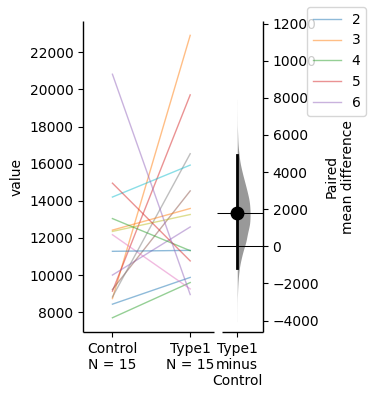

In [7]:
two_groups_paired_baseline = dabest.load(data=for_dabest, idx=("Control", "Type1"), id_col="Index", paired='baseline')
ax = two_groups_paired_baseline.mean_diff.plot(color_col='new_cage')
ax.legend(labels=two_groups_paired_baseline.data['new_cage'].unique())
